<a href="https://colab.research.google.com/github/gustavogrds/TCCs/blob/main/Cesar_Thais_Lucas/TCC_Lucas_Cesar_Thais_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Versão Melhorada

In [ ]:
# Versão Melhorada


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DBQ4_TCC2.xlsx', sheet_name='DB')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Data Hora,CupomFiscal,Produto,Quantidade,Valor
0,44835.353611,4-44835.3536111111,26 - SUCO DE LARANJA,1,13.5
1,44835.353611,4-44835.3536111111,32 - SUCO DE MARACUJA,1,14.5
2,44835.353611,4-44835.3536111111,43 - PASTEL DE BACALHAU,1,44.0
3,44835.353611,4-44835.3536111111,56 - BRAZUCA,1,49.5
4,44835.356481,3-44835.3564814813,201 - PASTEL CAMARAO,1,49.0


In [ ]:
df['Produto'] = df['Produto'].str.strip()
df.dropna(axis = 0, subset=['Data Hora'], inplace = True)
df['Data Hora'] = df['Data Hora'].astype('str')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Basket = (df
          .groupby(['Data Hora', 'Produto'])['Quantidade']
          .sum().unstack().reset_index().fillna(0)
          .set_index('Data Hora'))

Basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Produto,10 - PEPSI LIGHT,100 - MOLHO DE PIMENTA,1000 - ACRESCIMO,101 - EMBALAGEM LANCH,103 - PAO COM MANTEIGA,104 - PASTEL DE VENTO,108 - H2O LIMONETO,11 - PEPSI TWIST,13 - FANTA LARANJA,15 - SODA,...,81 - BRAZUQUINHA,82 - MORTADELINHA BRASIL,83 - PERNIL ESPECIAL,84 - PERNIL C/PROVOLONE,85 - AMERICANO ESPECIAL,86 - CARNE SECA SIMPLES,87 - CARNE SECA ESPECIAL,91 - CHURRASCO C/QUEIJO,94 - FILE FRANGO C/SALADA,98 - QUEIJO QUENTE
Data Hora,,,,,,,,,,,,,,,,,,,,,
44835.3536111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44835.3564814815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44835.3722106482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44835.3781828704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44835.3789699074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

Basket_Final = Basket.applymap(encode_units)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Basket_Final.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Produto,10 - PEPSI LIGHT,100 - MOLHO DE PIMENTA,1000 - ACRESCIMO,101 - EMBALAGEM LANCH,103 - PAO COM MANTEIGA,104 - PASTEL DE VENTO,108 - H2O LIMONETO,11 - PEPSI TWIST,13 - FANTA LARANJA,15 - SODA,...,81 - BRAZUQUINHA,82 - MORTADELINHA BRASIL,83 - PERNIL ESPECIAL,84 - PERNIL C/PROVOLONE,85 - AMERICANO ESPECIAL,86 - CARNE SECA SIMPLES,87 - CARNE SECA ESPECIAL,91 - CHURRASCO C/QUEIJO,94 - FILE FRANGO C/SALADA,98 - QUEIJO QUENTE
Data Hora,,,,,,,,,,,,,,,,,,,,,
44835.3536111111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44835.3564814815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44835.3722106482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44835.3781828704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44835.3789699074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44835.3790046296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44835.3790972222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44835.3792013889,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44835.3792476852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Frequent_itemsets = apriori(Basket_Final, min_support = 0.01, use_colnames = True)

Frequent_itemsets.sort_values('support', ascending = False).head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
30,0.165923,(56 - BRAZUCA)
26,0.150253,(521 - COCA COLA NORMAL)
31,0.145619,(7 - CHOPP BRAHMA CLARO)
24,0.119684,(48 - BOLINHO BACALHAU 1 UN)
6,0.080769,(23 - AGUA S/GAS)


In [ ]:
Asso_Rules = association_rules(Frequent_itemsets, metric = "lift", min_threshold = 1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Asso_Rules.sort_values('lift',ascending = False)
Asso_Rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(201 - PASTEL CAMARAO),(43 - PASTEL DE BACALHAU),0.079349,0.074267,0.011958,0.150706,2.029254,0.006065,1.090004,0.550923
1,(43 - PASTEL DE BACALHAU),(201 - PASTEL CAMARAO),0.074267,0.079349,0.011958,0.161020,2.029254,0.006065,1.097345,0.547899
2,(201 - PASTEL CAMARAO),(48 - BOLINHO BACALHAU 1 UN),0.079349,0.119684,0.017390,0.219152,1.831089,0.007893,1.127385,0.492996
3,(48 - BOLINHO BACALHAU 1 UN),(201 - PASTEL CAMARAO),0.119684,0.079349,0.017390,0.145296,1.831089,0.007893,1.077157,0.515584
4,(201 - PASTEL CAMARAO),(521 - COCA COLA NORMAL),0.079349,0.150253,0.013104,0.165149,1.099141,0.001182,1.017843,0.097973
5,(521 - COCA COLA NORMAL),(201 - PASTEL CAMARAO),0.150253,0.079349,0.013104,0.087216,1.099141,0.001182,1.008618,0.106148
6,(56 - BRAZUCA),(201 - PASTEL CAMARAO),0.165923,0.079349,0.019731,0.118919,1.498677,0.006566,1.044910,0.398938
7,(201 - PASTEL CAMARAO),(56 - BRAZUCA),0.079349,0.165923,0.019731,0.248666,1.498677,0.006566,1.110127,0.361424
8,(253 - CHOPP HEINEKEN),(7 - CHOPP BRAHMA CLARO),0.068039,0.145619,0.017838,0.262175,1.800418,0.007930,1.157972,0.477030
9,(7 - CHOPP BRAHMA CLARO),(253 - CHOPP HEINEKEN),0.145619,0.068039,0.017838,0.122498,1.800418,0.007930,1.062062,0.520346


In [ ]:
Asso_Rules.to_csv('tabela_regras')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Basket['56 - BRAZUCA'].sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


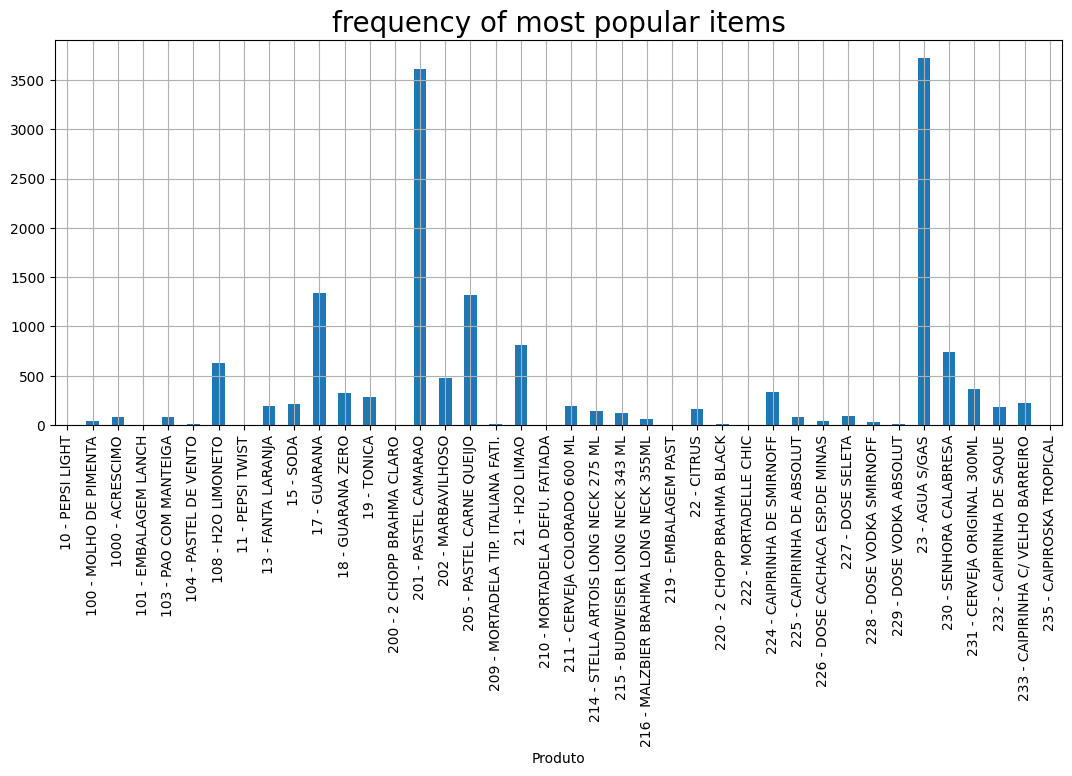

In [ ]:
import matplotlib.pyplot as plt

Basket.sum().head(40).plot.bar(figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()



In [ ]:
Basket.sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Produto
10 - PEPSI LIGHT                 2.0
100 - MOLHO DE PIMENTA          45.0
1000 - ACRESCIMO                79.0
101 - EMBALAGEM LANCH            1.0
103 - PAO COM MANTEIGA          79.0
                               ...  
86 - CARNE SECA SIMPLES         86.0
87 - CARNE SECA ESPECIAL      1156.0
91 - CHURRASCO C/QUEIJO          2.0
94 - FILE  FRANGO C/SALADA       1.0
98 - QUEIJO QUENTE              43.0
Length: 136, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


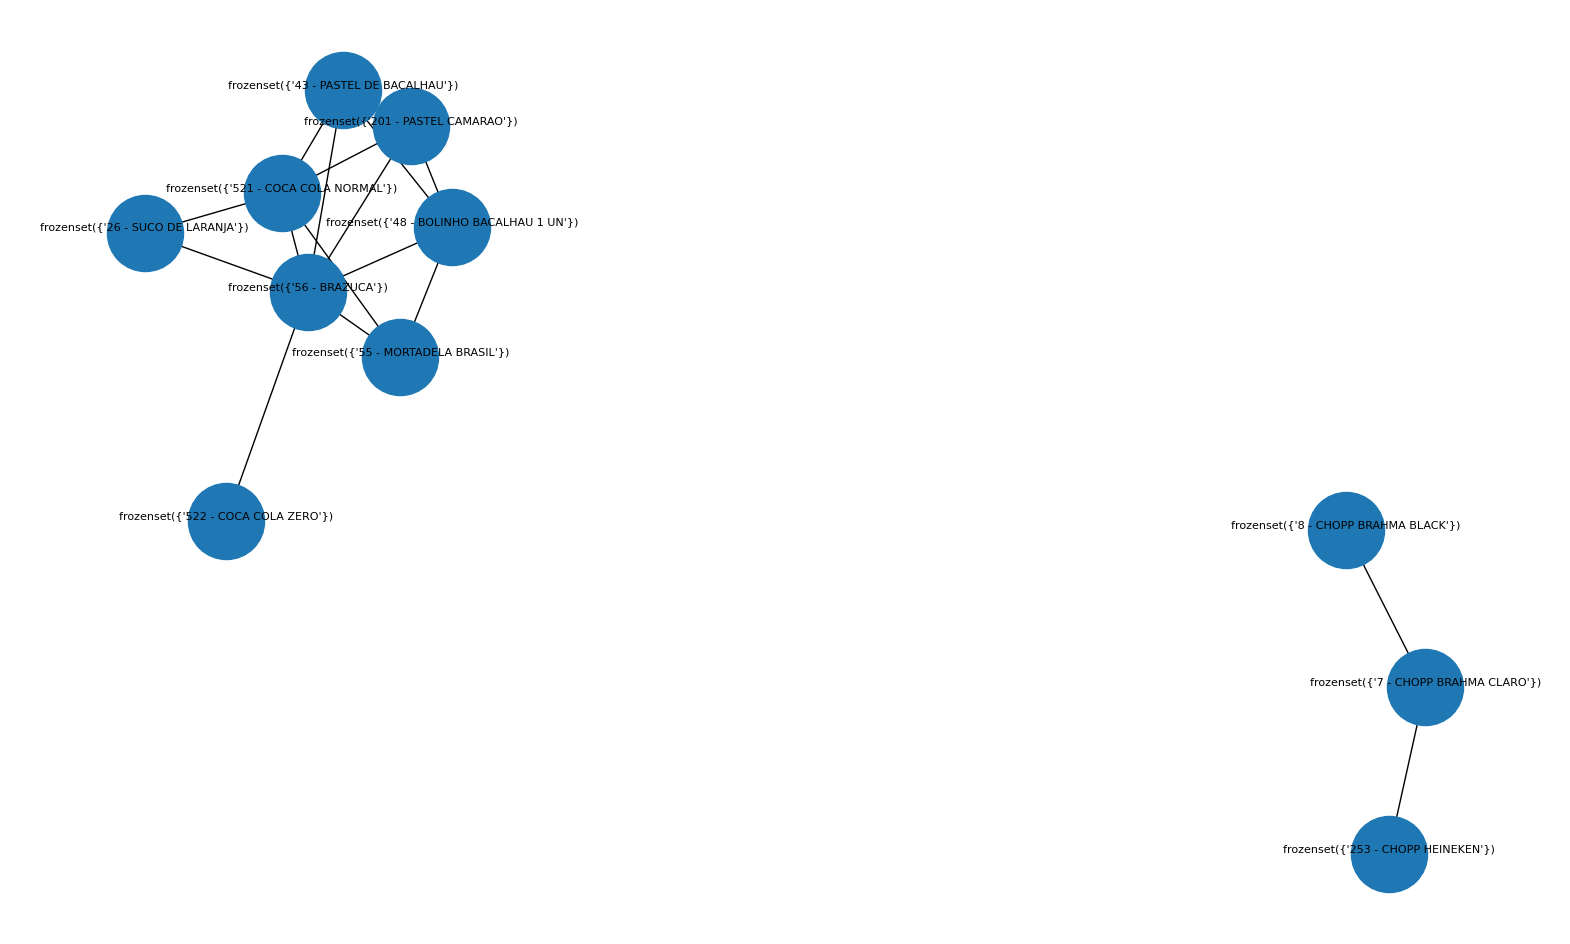

In [ ]:
import networkx as nx

fig, ax=plt.subplots(figsize=(20,12))
GA=nx.from_pandas_edgelist(Asso_Rules,source='antecedents',target='consequents')
#nx.draw(GA,with_labels=True)
options = {
    "font_size": 8,
    "node_size": 3000,
#    "node_color": "white",
#    "edgecolors": "black",
#    "linewidths": 2,
#    "width": 2,
     "verticalalignment":"bottom"
}
nx.draw_networkx(GA, **options)
plt.axis("off")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
